# Smart Bins - Time series analysis

Goal: The goal is to evaluate whether or not the gathered data can be used to
predict the time of when a bin should be emptied
Ideas: Use event and weather data for more accurate predictions

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. Prepare Data

## 1.1 Check data

In [32]:
# convert excel to csv
#df = pd.read_excel (r'Smart-Bins-Messwerte.xlsx', sheet_name='SmartBinsMesswerte')
#df.to_csv (r'smart_bins_messwerte.csv', index = None, header=True)

In [33]:
df = pd.read_csv("data/smart_bins_messwerte.csv")

In [34]:
df.head()

,GenMesswertID,Messzeitpunkt,Messwert,Messwerttyp,Füllstand,SensortypID,SensorID,Behältertyp,BauartID,Innenhöhe,Abfallfraktion,Standort
0,0,2020-12-22 00:24:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,VUF_Hillebrandt,2040,PPK,Schifferstr. 190
1,1,2020-12-22 00:54:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,VUF_Hillebrandt,2040,PPK,Schifferstr. 190
2,2,2020-12-22 01:24:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,VUF_Hillebrandt,2040,PPK,Schifferstr. 190
3,3,2020-12-22 01:54:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,VUF_Hillebrandt,2040,PPK,Schifferstr. 190
4,4,2020-12-22 02:24:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,VUF_Hillebrandt,2040,PPK,Schifferstr. 190


In [35]:
df.describe()

,GenMesswertID,Messwert,Füllstand,Innenhöhe
count,135314.0000,135314.000000,135314.000000,135314.000000
mean,67656.5000,183.578285,34.396271,1607.177454
std,39061.9315,424.505871,32.692551,304.681316
min,0.0000,-1.000000,-19.000000,1240.000000
25%,33828.2500,5.000000,4.000000,1390.000000
50%,67656.5000,34.000000,25.000000,1390.000000
75%,101484.7500,90.000000,55.000000,2040.000000
max,135313.0000,2500.000000,100.000000,2040.000000


In [36]:
# seems to be no data missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135314 entries, 0 to 135313
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   GenMesswertID   135314 non-null  int64 
 1   Messzeitpunkt   135314 non-null  object
 2   Messwert        135314 non-null  int64 
 3   Messwerttyp     135314 non-null  object
 4   Füllstand       135314 non-null  int64 
 5   SensortypID     135314 non-null  object
 6   SensorID        135314 non-null  object
 7   Behältertyp     135314 non-null  object
 8   BauartID        135314 non-null  object
 9   Innenhöhe       135314 non-null  int64 
 10  Abfallfraktion  135314 non-null  object
 11  Standort        135314 non-null  object
dtypes: int64(4), object(8)
memory usage: 12.4+ MB


In [37]:
# check time span
first_measurement = df["Messzeitpunkt"].min()
last_measurement = df["Messzeitpunkt"].max()
print(first_measurement, last_measurement)

2020-06-05 11:04:50 2021-03-05 06:30:00.000


In [38]:
df.groupby("Behältertyp").describe().transpose()

Behältertyp          Depotcontainer Altkleider CollectingSystems  \
GenMesswertID count                                 17990.000000   
              mean                                  79452.101556   
              std                                   38708.500904   
              min                                    4835.000000   
              25%                                   49369.250000   
              50%                                   85881.500000   
              75%                                  113101.000000   
              max                                  135274.000000   
Messwert      count                                 17990.000000   
              mean                                    166.031073   
              std                                     414.096406   
              min                                       0.000000   
              25%                                       0.000000   
              50%                                      10.000000   
              75%                                      35.000000   
              max                                    1655.000000   
Füllstand     count                                 17990.000000   
              mean                                     15.150528   
              std                                      18.900485   
              min                                       0.000000   
              25%                                       0.000000   
              50%                                       7.000000   
              75%                                      26.000000   
              max                                     100.000000   
Innenhöhe     count                                 17990.000000   
              mean                                   1590.000000   
              std                                       0.000000   
              min                                    1590.000000   
              25%                                    1590.000000   
              50%                                    1590.000000   
              75%                                    1590.000000   
              max                                    1590.000000   

Behältertyp          HUF LVP BWaste  HUF PPK BWaste  HUF Rest BWaste  \
GenMesswertID count    12046.000000    11999.000000     16307.000000   
              mean     56566.777935    56891.329277     73350.745324   
              std      33612.569734    33226.582935     41878.115055   
              min       2419.000000     3226.000000      1611.000000   
              25%      26113.250000    25359.500000     37006.500000   
              50%      53952.500000    53981.000000     72872.000000   
              75%      96148.750000    93998.500000    114777.500000   
              max     135309.000000   135308.000000    135283.000000   
Messwert      count    12046.000000    11999.000000     16307.000000   
              mean        95.271542      104.785065        97.938922   
              std        164.564313      178.619645       145.222580   
              min         -1.000000       -1.000000         0.000000   
              25%          1.000000        6.000000        28.000000   
              50%         32.000000       40.000000        59.000000   
              75%        100.000000      100.000000       100.000000   
              max       1302.000000     1354.000000      1302.000000   
Füllstand     count    12046.000000    11999.000000     16307.000000   
              mean        39.158144       45.594383        57.988717   
              std         36.413957       38.557866        35.194703   
              min         -1.000000       -1.000000         0.000000   
              25%          1.000000        6.000000        28.000000   
              50%         31.000000       38.000000        55.000000   
              75%         77.000000       91.000000        91.000000   
              max        10

## 1.2 Cleaning

In [39]:
data = df.rename(columns={"Messzeitpunkt":"date", "Messwert":"measurement", "Messwerttyp":"meas_type", "Füllstand":"level", "SensortypID":"sensor_type", "SensorID":"sensor_id", "Behältertyp": "container_type", "Innenhöhe":"in_height", "Abfallfraktion":"waste_type", "Standort":"location"})
data.drop(columns=['BauartID', 'GenMesswertID'], axis=1, inplace=True)


In [40]:
data

,date,measurement,meas_type,level,sensor_type,sensor_id,container_type,in_height,waste_type,location
0,2020-12-22 00:24:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,2040,PPK,Schifferstr. 190
1,2020-12-22 00:54:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,2040,PPK,Schifferstr. 190
2,2020-12-22 01:24:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,2040,PPK,Schifferstr. 190
3,2020-12-22 01:54:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,2040,PPK,Schifferstr. 190
4,2020-12-22 02:24:47,300,Distanz,89,EMZ,105915,VUF PPK Hillebrandt,2040,PPK,Schifferstr. 190
...,...,...,...,...,...,...,...,...,...,...
135309,2021-01-28 09:25:00.000,100,Füllstand,100,LEERUNG,3_2_HUF_LVP,HUF LVP BWaste,1390,LVP,Eichenhof 11-25
135310,2021-02-23 06:30:00.000,80,Füllstand,80,LEERUNG,1_1_VUF_LVP,VUF LVP Hillebrandt,2040,LVP,Schifferstr. 190
135311,2021-03-04 00:00:00.000,10,Füllstand,10,LEERUNG,1_1_VUF_LVP,VUF LVP Hillebrandt,2040,LVP,Schifferstr. 190
135312,2021-01-25 08:59:00.000,99,Füllstand,99,LEERUNG,2_1_OF_WG,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220


In [41]:
data["date"]= pd.to_datetime(data['date'])

In [42]:
data.info()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135314 entries, 0 to 135313
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            135314 non-null  datetime64[ns]
 1   measurement     135314 non-null  int64         
 2   meas_type       135314 non-null  object        
 3   level           135314 non-null  int64         
 4   sensor_type     135314 non-null  object        
 5   sensor_id       135314 non-null  object        
 6   container_type  135314 non-null  object        
 7   in_height       135314 non-null  int64         
 8   waste_type      135314 non-null  object        
 9   location        135314 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 10.3+ MB


date              135314
measurement       135314
meas_type         135314
level             135314
sensor_type       135314
sensor_id         135314
container_type    135314
in_height         135314
waste_type        135314
location          135314
dtype: int64

In [43]:
data.set_index("date", inplace=True)

In [44]:
data.groupby(["location", "sensor_type", "sensor_id", "container_type"]).count()

measurement  \
location            sensor_type sensor_id               container_type                                             
Eichenhof 11-25     BEOBACHTUNG 3_1_HUF_RM              HUF Rest BWaste                                       27   
                                3_2_HUF_LVP             HUF LVP BWaste                                        28   
                                3_3_HUF_PPK             HUF PPK BWaste                                        27   
                    EMZ         105917                  HUF Rest BWaste                                     2698   
                                105918                  HUF LVP BWaste                                      2697   
                                105919                  HUF PPK BWaste                                      2698   
                    LEERUNG     3_1_HUF_RM              HUF Rest BWaste                                        4   
                                3_2_HUF_LVP             HUF LVP BWaste                                         1   
                                3_3_HUF_PPK             HUF PPK BWaste                                         2   
                    MOBA_FLS    868597036989180         HUF Rest BWaste                                     3974   
                                868999033685946         HUF LVP BWaste                                      3784   
                                868999033687090         HUF PPK BWaste                                      3747   
                                868597036989180         HUF Rest BWaste                                     5493   
                                868999033685946         HUF LVP BWaste                                      5536   
                                868999033687090         HUF PPK BWaste                                      5525   
                    ZOLITRON    0d7b1                   HUF Rest BWaste                                     4111   
Herkenberger Str. 8 BEOBACHTUNG 4_1_VUF_WG              VUF WG BWaste                                         29   
                    EMZ         105920                  VUF WG BWaste                                       2697   
                    LEERUNG     4_1_VUF_WG              VUF WG BWaste                                          3   
                    MOBA_FLS    868999033697248         VUF WG BWaste                                       3947   
                                                        VUF WG BWaste                                       5498   
Schifferstr. 190    BEOBACHTUNG 1_1_VUF_LVP             VUF LVP Hillebrandt                                   29   
                                1_2 VUF_RM              VUF Rest Hillebrandt                                  29   
                                1_3_VUF_PPK             VUF PPK Hillebrandt                                   29   
                    EMZ         105915                  VUF PPK Hillebrandt                                 2697   
                                105916                  VUF Rest Hillebrandt                                3022   
                                105992                  VUF LVP Hillebrandt                                 2745   
                    LEERUNG     1_1_VUF_LVP             VUF LVP Hillebrandt                                    2   
                                1_2 VUF_RM              VUF Rest Hillebrandt                                  13   
                                1_3_VUF_PPK             VUF PPK Hillebrandt                                   10   
                    MOBA_FLS    868597036814008         VUF Rest Hillebrandt                                5147   
                                868597036918692         VUF LVP Hillebrandt                                 3973   
                                868999033700455         VUF PPK Hillebrandt                                 8510   
                                868597036

In [45]:
data["location"].value_counts()

Schifferstr. 190       42485
Eichenhof 11-25        40352
Schifferstr. 220       40303
Herkenberger Str. 8    12174
Name: location, dtype: int64

In [46]:
data["sensor_type"].value_counts()

MOBA_FLS       83337
EMZ            24312
ZOLITRON       20555
PF_WILSEN       6806
BEOBACHTUNG      256
LEERUNG           48
Name: sensor_type, dtype: int64

In [47]:
data["waste_type"].value_counts()

Rest          34420
WG            30374
PPK           24894
LVP           23523
Altkleider    17990
BG             4113
Name: waste_type, dtype: int64

# Filter for specific sensortype 


In [48]:
location = data["location"]=="Schifferstr. 220"
sensor_type = data["sensor_type"]=="MOBA_FLS"
waste_type = data["waste_type"]=="WG"
real_check = data["sensor_type"]=="BEOBACHTUNG"
filtered_data = data[(location) & (sensor_type) & (waste_type)]
filtered_real = data[(location) & (real_check) & (waste_type)]
filtered_data

,measurement,meas_type,level,sensor_type,sensor_id,container_type,in_height,waste_type,location
date,,,,,,,,,
2020-08-12 11:50:31,71,Füllstand,71,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220
2020-08-12 11:20:30,78,Füllstand,78,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220
2020-08-12 10:50:29,77,Füllstand,77,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220
2020-08-12 10:20:28,78,Füllstand,78,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220
2020-08-12 09:50:27,78,Füllstand,78,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220
...,...,...,...,...,...,...,...,...,...
2021-02-11 17:24:29,100,Füllstand,100,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220
2021-02-11 16:54:28,100,Füllstand,100,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220
2021-02-11 16:24:27,100,Füllstand,100,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220


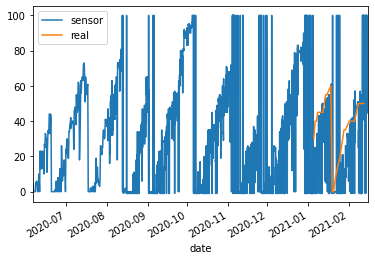

In [49]:
# compare sensor data with real evaluation
filtered_data['level'].plot(label="sensor").autoscale(axis='x',tight=True)
filtered_real['level'].plot(label="real").autoscale(axis='x',tight=True)
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Daily level values'}, xlabel='date'>

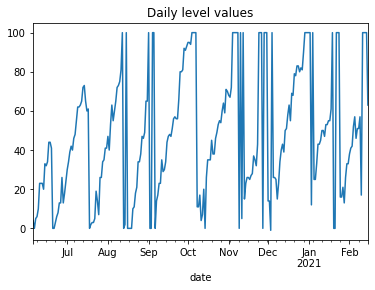

In [50]:
# resample data to daily basis
# Question : is max or mean better ? 
filtered_data['level'].resample('D').max().plot(title='Daily level values')

In [51]:
from statsmodels.tsa.filters.hp_filter import hpfilter

level_cycle, level_trend = hpfilter(filtered_data['level'], lamb=129600)

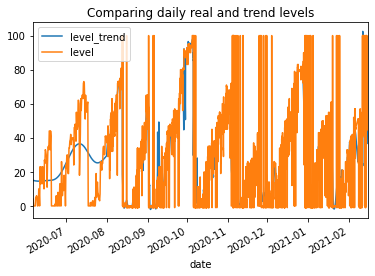

In [52]:
filtered_data['level_trend'] = level_trend
filtered_data[['level_trend','level']].plot(title='Comparing daily real and trend levels').autoscale(axis='x',tight=True);


# Train / Test split

In [53]:
total_data=len(sampled_data)

NameError: name 'sampled_data' is not defined

In [30]:

train_data = sampled_data.iloc[:int(total_data*0.8)] 
test_data = sampled_data.iloc[int(total_data*0.8):]

NameError: name 'sampled_data' is not defined

In [26]:
test_data

,measurement,meas_type,level,sensor_type,sensor_id,container_type,in_height,waste_type,location,level_trend
date,,,,,,,,,,
2020-11-12 17:53:00,-1,Füllstand,-1,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,2.891387
2020-11-12 17:23:00,-1,Füllstand,-1,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,2.951632
2020-11-12 16:53:00,-1,Füllstand,-1,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,3.011060
2020-11-12 16:23:00,-1,Füllstand,-1,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,3.069319
2020-11-12 15:53:00,-1,Füllstand,-1,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,3.126029
...,...,...,...,...,...,...,...,...,...,...
2021-02-11 17:24:29,100,Füllstand,100,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,100.525815
2021-02-11 16:54:28,100,Füllstand,100,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,101.011175
2021-02-11 16:24:27,100,Füllstand,100,MOBA_FLS,868999033699327,Iglu Weissglas Rühland,1390,WG,Schifferstr. 220,101.495056


# AR Model

In [27]:
from statsmodels.tsa.ar_model import AR,ARResults
import warnings
warnings.filterwarnings("ignore")

In [28]:
model = AR(sampled_data)
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

In [ ]:
test_data.plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [ ]:
model = AR(train_data)
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

In [ ]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

In [ ]:
test_data.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

# Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(11)']
preds = [predictions1, predictions11] 

for i in range(2):
    error = mean_squared_error(test_data, preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

# Visualize on Map 

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="example app")

In [ ]:
def add_city(street:str):
    return street + ", Duisburg"


In [ ]:
schiffer_190 = geolocator.geocode("Schifferstr. 190, Duisburg")
eichenhof = geolocator.geocode("Eichenhof 11-25, Duisburg")
schiffer_220 = geolocator.geocode("Schifferstr. 220, Duisburg")
herkenberg = geolocator.geocode("Herkenberger Str. 8, Duisburg")

In [ ]:
def add_loc(street:str):
    if street == "Schifferstr. 190":
        return schiffer_190
    if street == "Eichenhof 11-25":
        return eichenhof
    if street == "Schifferstr. 220":
        return schiffer_220
    if street == "Herkenberger Str. 8":
        return herkenberg

In [ ]:
data["loc"] = data["location"].apply(add_loc)

In [ ]:
#turns out this method is very slow and overkill for 4 different locations
#data["loc"] = df["location"].apply(add_city)
#data["loc"] = data["loc"].apply(geolocator.geocode)

In [ ]:
data["point"]= data["loc"].apply(lambda loc: tuple(loc.point) if loc else None)
data[['lat', 'lon', 'altitude']] = pd.DataFrame(data['point'].to_list(), index=data.index)

In [ ]:
import folium
from folium.plugins import MarkerCluster


In [ ]:
street_map = folium.Map(location=data[["lat", "lon"]].mean().to_list(), zoom_start=2)# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(m)
for i,r in data.iterrows():
    location = (r["lat"], r["lon"])
    folium.Marker(location=location,
                      popup = r['container_type'],
                      tooltip=r['container_type'])\
    .add_to(marker_cluster)

In [ ]:
street_map

In [ ]:
# alternative karte : plotly, 